# Primer practico diplodatos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import scipy

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
seaborn.set_context(context='talk', font_scale=1.2)

In [4]:
dataset = pandas.read_csv("hfi_cc_2018.csv")

In [5]:
dataset.shape

(1458, 123)

In [6]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [7]:
dataset[:5]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [8]:
dataset.columns  # Way too many columns!

important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [9]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


# 1) Estadísticos descriptivos

1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [10]:
#Se calculan los rangos para todas las variables que no son categóricas

In [11]:

rangos={}
for col in important_cols:
    try:
        rangos[col]=numpy.ptp(dataset[col])
    except:
        pass
rangos        
        

{'year': 8,
 'pf_identity_legal': 10.0,
 'pf_identity_parental_marriage': 10.0,
 'pf_identity_parental_divorce': 10.0,
 'pf_identity_parental': 10.0,
 'pf_identity_sex_male': 10.0,
 'pf_identity_sex_female': 10.0,
 'pf_identity_sex': 10.0,
 'pf_identity_divorce': 10.0,
 'pf_identity': 10.0,
 'ef_score': 6.31,
 'ef_rank': 161.0,
 'hf_score': 5.360486062,
 'hf_rank': 161.0}

1.2 Obtener media, mediana y desviación estándar de las variables pf_identity
y hf_score en el mundo y compararla con la de Latinoamérica y el caribe.
¿Tiene sentido calcular la moda?

In [12]:
# se calculan las medidas descriptivas para las variables 'pf_identity' y 'hf_score' para todos los paises que conforman 
#la muestra y luego para el caso particular de los paises latinoamericanos y caribeños

In [13]:
print('Mundo')
print("Moda pf_identity: ",scipy.stats.mode(dataset["pf_identity"],nan_policy="omit")[0][0],". Se repite ",scipy.stats.mode(dataset["pf_identity"],nan_policy="omit")[1][0]," veces")  
print("Mediana pf_identity: ",numpy.nanmedian(dataset["pf_identity"]) )
print("Media pf_identity: ",numpy.nanmean(dataset["pf_identity"]))
print("Desviación estándar pf_identity: ",numpy.nanstd(dataset["pf_identity"]),"/n")
print('---------------------------------------')
print("Moda hf_score: ",scipy.stats.mode(dataset["hf_score"],nan_policy="omit")[0][0],". Se repite ",scipy.stats.mode(dataset["hf_score"],nan_policy="omit")[1][0]," veces")  
print("Mediana hf_score: ",numpy.nanmedian(dataset["hf_score"]) )
print("Media hf_score: ",numpy.nanmean(dataset["hf_score"]))
print("Desviación estándar hf_score: ",numpy.nanstd(dataset["hf_score"]))

Mundo
Moda pf_identity:  10.0 . Se repite  601.0  veces
Mediana pf_identity:  9.166666667000001
Media pf_identity:  7.334179970968069
Desviación estándar pf_identity:  3.1583260555019637 /n
---------------------------------------
Moda hf_score:  7.5681402879999995 . Se repite  1.0  veces
Mediana hf_score:  6.923840432999999
Media hf_score:  6.993443755514514
Desviación estándar hf_score:  1.0254388834900923


In [14]:
print('Latinoamerica y el caribe ')
print("Moda pf_identity: ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'],nan_policy="omit")[0][0], ". Se repite ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'],nan_policy="omit")[1][0]," veces")
print("Mediana pf_identity: ",numpy.nanmedian(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity']))
print("Media pf_identity: ",numpy.nanmean(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity']))
print("Desviación estándar pf_identity: ",numpy.nanstd(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity']),"/n")
print('---------------------------------------')
print("Moda hf_score: ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'],nan_policy="omit")[0][0], ". Se repite ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'],nan_policy="omit")[1][0]," veces")
print("Mediana hf_score: ",numpy.nanmedian(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score']))
print("Media hf_score: ",numpy.nanmean(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score']))
print("Desviación estándar hf_score: ",numpy.nanstd(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score']),"/n")

Latinoamerica y el caribe 
Moda pf_identity:  10.0 . Se repite  136.0  veces
Mediana pf_identity:  10.0
Media pf_identity:  8.765086206909483
Desviación estándar pf_identity:  1.7080389127332938 /n
---------------------------------------
Moda hf_score:  6.469847841 . Se repite  136.0  veces
Mediana hf_score:  7.02804474
Media hf_score:  7.047981929952586
Desviación estándar hf_score:  0.6075903811029444 /n


1.3  ¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?

1.4 ¿Cómo pueden sanearse los valores faltantes?

In [15]:
limpieza_na=dataset[important_cols]
limpieza_na[:5]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0


In [16]:
limpieza_na.shape

(1458, 17)

In [17]:
limpieza=limpieza_na.dropna()
limpieza

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250,7.54,34.0,7.568140,48.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250,6.49,106.0,6.083277,130.0
10,2016,BGD,Bangladesh,South Asia,0.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0,1.250,6.30,120.0,5.801300,138.0
12,2016,BLR,Belarus,Eastern Europe,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000,6.23,123.0,6.144514,128.0
13,2016,BEL,Belgium,Western Europe,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250,7.32,52.0,8.153589,27.0


1.5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos?
¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

In [18]:
# Para 'hf_score'
quartiles=numpy.nanquantile(dataset["hf_score"],[0.25,0.75])

rango_intercuartil=quartiles[1]-quartiles[0]

extremo_max, extremo_min = quartiles[1]+rango_intercuartil,quartiles[0]-rango_intercuartil

print("Cantidad de valores menores al extremo inferior: ",len(dataset[dataset["hf_score"]<extremo_min]) )


print("Cantidad de valores mayores al extremo superior: ",len(dataset[dataset["hf_score"]>extremo_max]) )

Cantidad de valores menores al extremo inferior:  19
Cantidad de valores mayores al extremo superior:  0


In [19]:
# Para pf_identity

quartiles=numpy.nanquantile(dataset["pf_identity"],[0.25,0.75])

rango_intercuartil=quartiles[1]-quartiles[0]

extremo_max, extremo_min = quartiles[1]+rango_intercuartil,quartiles[0]-rango_intercuartil

print("Cantidad de valores menores al extremo inferior: ",len(dataset[dataset["pf_identity"]<extremo_min]) )

print("Cantidad de valores mayores al extremo superior: ",len(dataset[dataset["pf_identity"]>extremo_max]) )


Cantidad de valores menores al extremo inferior:  0
Cantidad de valores mayores al extremo superior:  0


# 2) Agregación de Datos

2.1 Grafiquen la media de la variable pf_identity y hf_score a través de los años.

In [20]:
# Se grafican las medias de las variables 'pf_identity' y 'hf_score'

(0, 10)

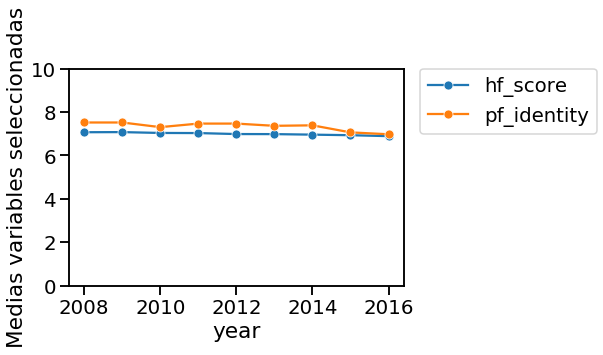

In [21]:

medias=pandas.DataFrame(columns=["year","pf_identity","hf_score"])
for anio in numpy.unique(dataset["year"]):

    media_hf=numpy.nanmean(dataset["hf_score"][dataset["year"]==anio])
    media_pf=numpy.nanmean(dataset["pf_identity"][dataset["year"]==anio])
    
    medias=medias.append({"year":anio,"hf_score":media_hf,"pf_identity":media_pf},ignore_index=True)
    
seaborn.lineplot(x="year",y="hf_score",data=medias,marker="o",label="hf_score")
seaborn.lineplot(x="year",y="pf_identity",data=medias,marker="o",label="pf_identity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Medias variables seleccionadas')
plt.ylim(0,10)



2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

In [67]:
# Se obtienen las diferentes regiones que contiene el dataset
print('Las regiones consideradas son \n '
      ,numpy.unique(dataset["region"]))

Las regiones consideradas son 
  ['Caucasus & Central Asia' 'East Asia' 'Eastern Europe'
 'Latin America & the Caribbean' 'Middle East & North Africa'
 'North America' 'Oceania' 'South Asia' 'Sub-Saharan Africa'
 'Western Europe']


In [23]:
medias=pandas.DataFrame(dataset, columns=["year","pf_identity","region","hf_score"]).dropna()
medias= pandas.pivot_table(medias, index= "region", columns = "year", aggfunc= "mean")
medias

hf_score                                \
year                               2008      2009      2010      2011   
region                                                                  
Caucasus & Central Asia        7.027743  7.025672  6.975023  6.819008   
East Asia                      7.741378  7.723779  7.769861  7.843124   
Eastern Europe                 7.710244  7.719634  7.696403  7.716152   
Latin America & the Caribbean  7.118196  7.113860  7.087213  7.084865   
Middle East & North Africa     6.342013  6.304318  6.259184  6.211953   
North America                  8.550634  8.449922  8.450481  8.422230   
Oceania                        8.008484  7.887855  7.928538  7.795075   
South Asia                     6.451640  6.552607  6.652849  6.629122   
Sub-Saharan Africa             6.157588  6.207078  6.246401  6.262749   
Western Europe                 8.381446  8.330795  8.335004  8.361464   

                                                                       \
year                               2012      2013      2014      2015   
region                                                                  
Caucasus & Central Asia        6.875845  6.846133  6.849528  6.772257   
East Asia                      7.828456  7.846940  7.862007  7.852107   
Eastern Europe                 7.692239  7.671658  7.675139  7.623544   
Latin America & the Caribbean  7.045974  7.037416  7.015536  6.979706   
Middle East & North Africa     6.076486  5.963931  5.915510  5.820231   
North America                  8.424809  8.407559  8.524919  8.449421   
Oceania                        7.757498  7.800587  7.815776  7.856745   
South Asia                     6.568750  6.540197  6.477795  6.474168   
Sub-Saharan Africa             6.212561  6.341948  6.292692  6.301390   
Western Europe                 8.338814  8.357082  8.426261  8.416442   

                                        pf_identity                        \
year                               2016        2008       2009       2010   
region                                                                      
Caucasus & Central Asia        6.773409    9.500000   9.500000   9.583333   
East Asia                      7.849527   10.000000  10.000000  10.000000   
Eastern Europe                 7.545715    9.880952   9.880952   9.880952   
Latin America & the Caribbean  6.954305    8.900000   8.900000   8.942308   
Middle East & North Africa     5.758610    3.653846   3.653846   2.941176   
North America                  8.477259   10.000000  10.000000  10.000000   
Oceania                        7.878301    9.375000   9.375000   9.375000   
South Asia                     6.467668    5.833333   5.833333   6.166667   
Sub-Saharan Africa             6.265716    4.785714   4.785714   4.736842   
Western Europe                 8.367332   10.000000  10.000000  10.000000   

                                                                           \
year                                2011       2012       2013       2014   
region                                                                      
Caucasus & Central Asia         8.750000   8.750000   8.055556   8.611111   
East Asia                      10.000000  10.000000  10.000000  10.000000   
Eastern Europe                  9.880952   9.880952   9.682540   9.761905   
Latin America & the Caribbean   9.038462   9.038462   9.134615   9.006410   
Middle East & North Africa      3.235294   3.235294   2.268519   2.361111   
North America                  10.000000  10.000000  10.000000  10.000000   
Oceania                         8.750000   8.750000   9.375000   9.375000   
South Asia                      6.000000   6.000000   5.156250   5.539216   
Sub-Saharan Africa              5.460526   5.460526   6.197917   6.128049   
Western Europe                 10.000000  10.000000   9.907407   9.907407   

                                                   
year                               2015      2016  
region                 

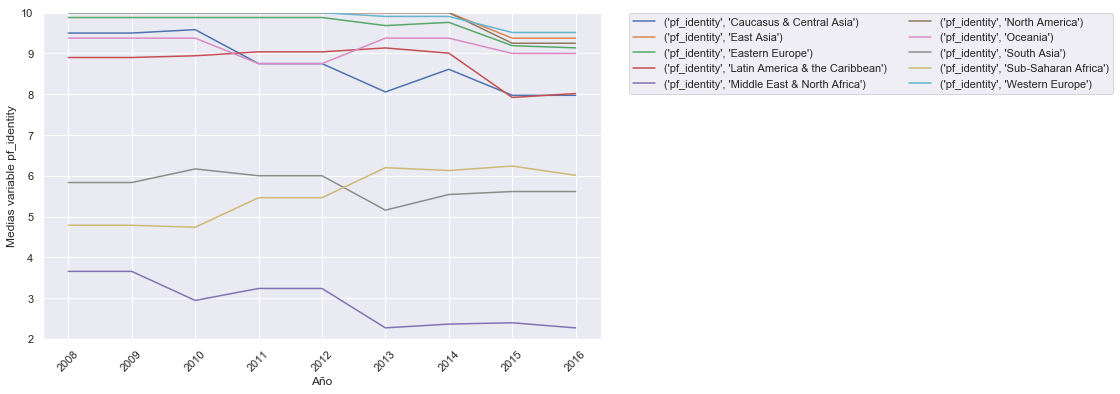

In [88]:
#Se calcula la media de la variable pf_identity para cada región, por año

medias=pandas.DataFrame(dataset, columns=["year","pf_identity","region"]).dropna()
medias= pandas.pivot_table(medias, index= "year", columns = "region", aggfunc= "mean")

plt.figure(figsize=(10,6))
seaborn.set()
ax = plt.plot(medias, label='Using set_dashes()')
                    
plt.legend(medias.columns, bbox_to_anchor=(1.05, 1), 
           ncol=2, 
           borderaxespad=0.)
plt.ylabel('Medias variable pf_identity')
plt.xlabel('Año')
plt.ylim(2,10)
plt.xticks(rotation=45)
seaborn.despine()


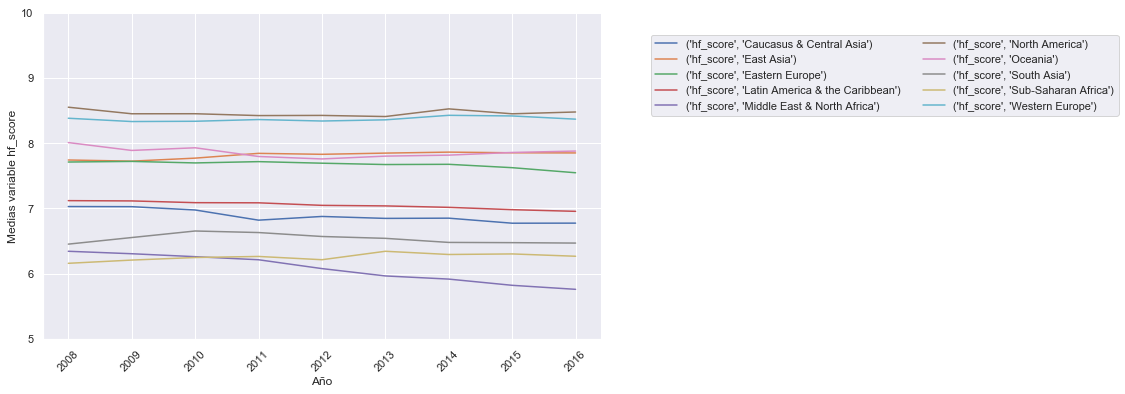

In [87]:
#Se calcula la media de la variable hf_score para cada región, por año

medias=pandas.DataFrame(dataset, columns=["year","hf_score","region"]).dropna()
medias= pandas.pivot_table(medias, index= "year", columns = "region", aggfunc= "mean")

plt.figure(figsize=(10,6))
seaborn.set()
ax = plt.plot(medias, label='Using set_dashes()')
                    
plt.legend(medias.columns, bbox_to_anchor=(1.05, 1), 
           ncol=2, 
           borderaxespad=2)
plt.ylabel('Medias variable hf_score')
plt.xlabel('Año')
plt.ylim(5,10)
plt.xticks(rotation=45)
seaborn.despine()

2.3 Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

In [109]:
latam=dataset[dataset['region']=='Latin America & the Caribbean']
latam_1=latam.dropna()


In [114]:
print('La media en la región de la variable pf_identity es igual a ', numpy.nanmean(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity']))
medias=pandas.DataFrame(latam, columns=["year","pf_identity",'region','countries']).dropna()
medias= pandas.pivot_table(medias, index= "countries", columns = "year", aggfunc= "mean")
medias



La media en la región de la variable pf_identity es igual a  8.765086206909483


pf_identity                                       \
year                       2008  2009  2010   2011   2012       2013   
countries                                                              
Argentina                  10.0  10.0  10.0  10.00  10.00  10.000000   
Bahamas                    10.0  10.0  10.0  10.00  10.00  10.000000   
Barbados                    5.0   5.0   5.0   5.00   5.00   5.000000   
Belize                      7.5   7.5   7.5   7.50   7.50   7.500000   
Bolivia                    10.0  10.0  10.0  10.00  10.00  10.000000   
Brazil                     10.0  10.0  10.0  10.00  10.00  10.000000   
Chile                      10.0  10.0  10.0  10.00  10.00   6.666667   
Colombia                   10.0  10.0  10.0  10.00  10.00  10.000000   
Costa Rica                 10.0  10.0  10.0  10.00  10.00   9.166667   
Dominican Rep.             10.0  10.0  10.0  10.00  10.00  10.000000   
Ecuador                    10.0  10.0  10.0  10.00  10.00  10.000000   
El Salvador                10.0  10.0  10.0  10.00  10.00  10.000000   
Guatemala                  10.0  10.0  10.0   6.25   6.25   8.333333   
Guyana                      5.0   5.0   5.0  10.00  10.00  10.000000   
Haiti                       7.5   7.5   7.5   6.25   6.25   7.500000   
Honduras                    7.5   7.5   7.5   8.75   8.75  10.000000   
Jamaica                     7.5   7.5   7.5   7.50   7.50   8.333333   
Mexico                     10.0  10.0  10.0  10.00  10.00  10.000000   
Nicaragua                  10.0  10.0  10.0   8.75   8.75   9.166667   
Panama                     10.0  10.0  10.0  10.00  10.00  10.000000   
Paraguay                   10.0  10.0  10.0  10.00  10.00  10.000000   
Peru                        7.5   7.5   7.5  10.00  10.00   9.166667   
Suriname                    NaN   NaN  10.0  10.00  10.00  10.000000   
Trinidad and Tobago         5.0   5.0   5.0   5.00   5.00   6.666667   
Uruguay                    10.0  10.0  10.0  10.00  10.00  10.000000   
Venezuela                  10.0  10.0  10.0  10.00  10.00  10.000000   

                                                      
year                      2014       2015       2016  
countries                                             
Argentina            10.000000  10.000000  10.000000  
Bahamas              10.000000  10.000000  10.000000  
Barbados              5.000000   5.000000   5.000000  
Belize                7.500000   7.500000  10.000000  
Bolivia              10.000000  10.000000  10.000000  
Brazil               10.000000   7.500000   7.500000  
Chile                 6.666667   5.000000   5.000000  
Colombia             10.000000  10.000000  10.000000  
Costa Rica            9.166667   6.875000   6.875000  
Dominican Rep.       10.000000   7.500000   7.500000  
Ecuador              10.000000  10.000000  10.000000  
El Salvador          10.000000   7.500000   7.500000  
Guatemala             8.333333   6.250000   6.250000  
Guyana                5.000000   5.000000   5.000000  
Haiti                 9.166667   6.875000   6.875000  
Honduras             10.000000   7.500000   7.500000  
Jamaica               8.333333   6.250000   6.250000  
Mexico               10.000000  10.000000  10.000000  
Nicaragua             9.166667   6.875000   6.875000  
Panama               10.000000   9.250000   9.250000  
Paraguay             10.000000   7.500000   7.500000  
Peru                  9.166667   9.375000   9.375000  
Suriname             10.000000  10.000000  10.000000  
Trinidad and Tobago   6.666667   6.666667   6.666667  
Uruguay              10.000000  10.000000  10.000000  
Venezuela            10.000000   7.500000   7.500000

# 3) Distribuciones

3.1 Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

In [ ]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'], 
    bins=20, label='Latin America & the Caribbean', color='red')

seaborn.distplot(
    dataset["pf_identity"],
    bins=20, label='Global', color='green')

plt.ylabel('Densidad probabilidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)
plt.figure(figsize=(20,10))
seaborn.despine()

In [ ]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'], 
    bins=20, label='Latin America & the Caribbean',color='red')

seaborn.distplot(
    dataset['hf_score'],
    bins=20, label='Global', color='green')

plt.ylabel('Densidad probabilidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)
plt.figure(figsize=(20,10))
seaborn.despine()

3.2 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. 

3.3 Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas

In [28]:
matrizlimpia=dataset[important_cols[12:16]]

In [29]:
x=matrizlimpia.dropna()
y=matrizlimpia.dropna()

Distribución para la variable hf_score

In [30]:

from scipy import stats
loc, scale = stats.norm.fit(x['hf_score'])
loc, scale

(6.993443755514514, 1.0254388834900923)

In [31]:
norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(2000)


In [32]:
percs = numpy.linspace(0,100,10)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(x['hf_score'], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(x['hf_score'])), percs)

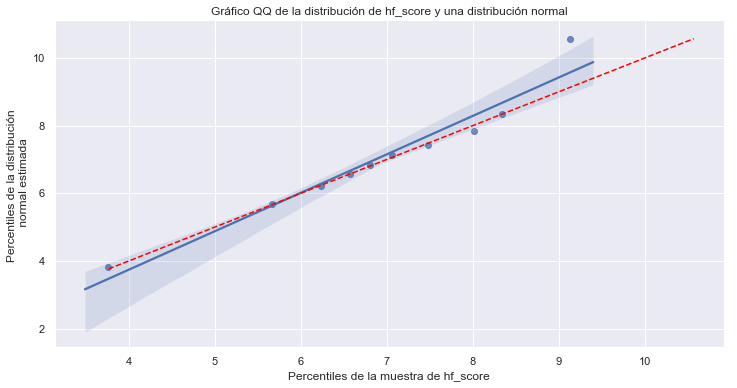

In [34]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de hf_score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='red', ls="--")

seaborn.despine()


Distribución para la variable pf_identity

In [35]:
loc, scale = stats.norm.fit(y['pf_identity'])
loc, scale

(7.334179970968069, 3.1583260555019637)

In [36]:
norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(2000)

In [37]:
percs = numpy.linspace(0,100,10)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(y['pf_identity'], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(y['pf_identity'])), percs)

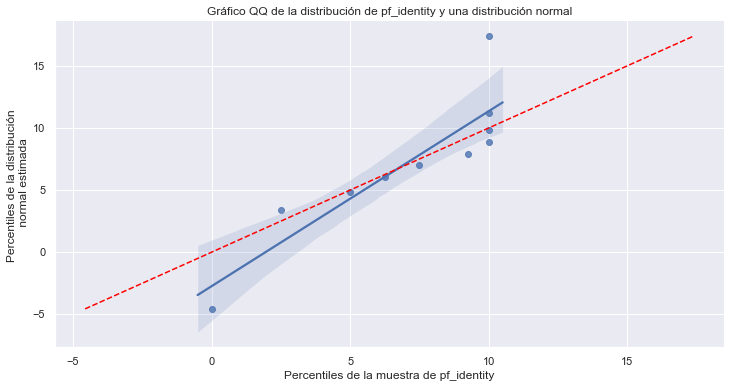

In [38]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity y una distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='red', ls="--")

seaborn.despine()

3.4 Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

# 4) Correlaciones

En este ejercicio queremos responder a las preguntas

Las libertades sociales y económicas, ¿van siempre de la mano?
¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?
Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score.

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación

4.1 ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

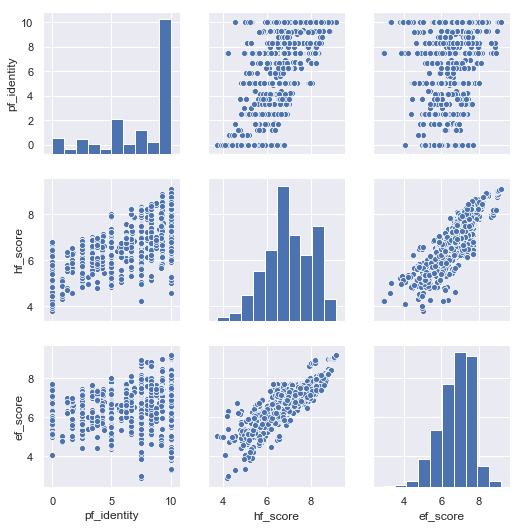

In [115]:
dataset_1=dataset[['pf_identity', 'hf_score', 'ef_score']].dropna()
seaborn.pairplot(
    data=dataset_1,
    vars=['pf_identity', 'hf_score', 'ef_score'])

4.2 Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

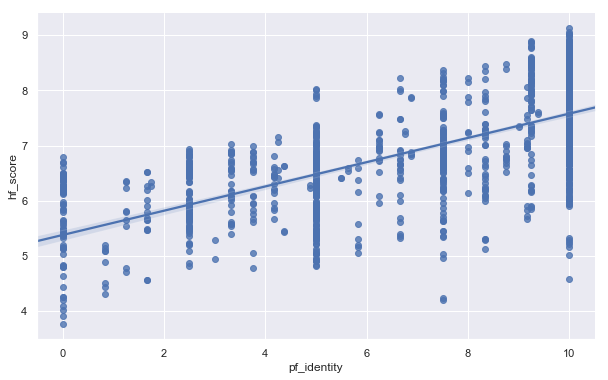

In [126]:
# RegPlot para las variables pf_identity y hf_score

plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset_1,
                    x='pf_identity',
                    y='hf_score')
seaborn.despine()
               

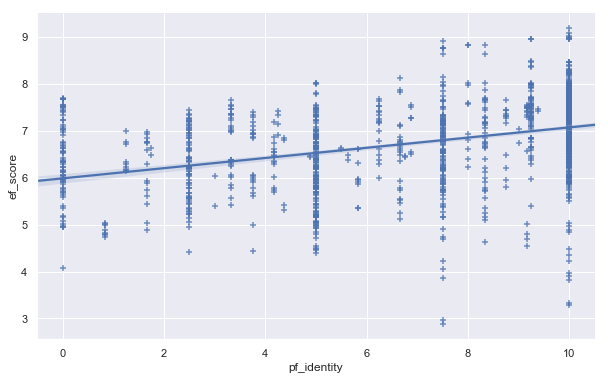

In [127]:
# RegPlot para las variables pf_identity y ef_score

plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset_1,
                    x='pf_identity', y='ef_score',
                    marker='+')

seaborn.despine()

4.3 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.

In [116]:
scipy.stats.pearsonr(dataset_1["pf_identity"],dataset_1["hf_score"])
scipy.stats.spearmanr(dataset_1["pf_identity"],dataset_1["hf_score"])
scipy.stats.kendalltau(dataset_1["pf_identity"],dataset_1["hf_score"])

KendalltauResult(correlation=0.5213095523555771, pvalue=3.65763160993025e-157)

4.4 [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable region es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)